**Homework - Lecture 2**

---

*Instructions:* Please complete the following exercises and submit your solutions by the next class session.

---

# Maximum Likelihood Estimation (MLE) of Multivariate Normal Distribution

**1. Prove the formulas for the MLE of the mean 
vector and covariance matrix of a multivariate normal distribution.**

**2. Comment on the bias of the MLE estimator for the covariance matrix. How to correct it?**

# Stock Data Analysis

**1. Imports the necessary libraries**

In [1]:
# TODO
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import yfinance as yf
from scipy import stats
import seaborn as sns

sns.set_theme("talk")
sns.set_style("whitegrid")
mpl.rcParams["figure.figsize"] = (8, 6)

**2. Using the api [yfinance](https://pypi.org/project/yfinance/) , download the historical daily prices for Apple, JP Morgan, Pfizer, and Exxon Mobil, for the period from January 1, 2020, to December 31, 2025. Save the data in four distinct DataFrames and save the data in a csv file. Describe quickly each dataset.**

In [2]:
# TODO
# Define tickers and time period
tickers = ["AAPL", "JPM", "PFE", "XOM"]
start_date = "2020-01-01"
end_date = "2025-12-31"

# Fetch stock data
stocks_data = {}
for ticker in tickers:
    # Fetch data from Yahoo Finance
    df = yf.download(ticker, start=start_date, end=end_date)
    stocks_data[ticker] = df
    print(f"Fetched data for {ticker}: {df.shape[0]} rows.")

# Save data to CSV files
for ticker in tickers:
    stocks_data[ticker].to_csv(f"data/02_{ticker}_data.csv")
    print(f"Saved {ticker} data to data/02_{ticker}_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetched data for AAPL: 1507 rows.



[*********************100%***********************]  1 of 1 completed

Fetched data for JPM: 1507 rows.


Fetched data for PFE: 1507 rows.


[*********************100%***********************]  1 of 1 completed

Fetched data for XOM: 1507 rows.
Saved AAPL data to data/02_AAPL_data.csv
Saved JPM data to data/02_JPM_data.csv
Saved PFE data to data/02_PFE_data.csv
Saved XOM data to data/02_XOM_data.csv


In [3]:
#describe data
for ticker in tickers:
    print(f"\nDescriptive statistics for {ticker}:")
    print(stocks_data[ticker].describe())


Descriptive statistics for AAPL:
Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   1507.000000  1507.000000  1507.000000  1507.000000  1.507000e+03
mean     164.870690   166.554968   163.018727   164.708612  8.457532e+07
std       49.658740    49.950404    49.314899    49.613538  5.136009e+07
min       54.264343    55.263193    51.420164    55.161616  1.791060e+07
25%      131.416801   132.850217   130.053244   131.765482  5.077930e+07
50%      163.345642   165.337281   162.026383   163.585266  7.040420e+07
75%      197.145859   199.314363   194.668959   196.835582  1.005777e+08
max      286.190002   288.619995   283.299988   286.200012  4.265100e+08

Descriptive statistics for JPM:
Price         Close         High          Low         Open        Volume
Ticker          JPM          JPM          JPM          JPM           JPM
count   1507.000000  1507.000000  1507.000000  1507.00000

**3. For each stock, calculate the daily returns and add them as a 
new column in the respective DataFrame. Plot the returns for each stock using a 2x2 figure.**


Daily returns for AAPL:
Price           Close Daily Return
Ticker           AAPL             
Date                              
2020-01-02  72.468262          NaN
2020-01-03  71.763718    -0.009722
2020-01-06  72.335548     0.007968
2020-01-07  71.995354    -0.004703
2020-01-08  73.153519     0.016087

Daily returns for JPM:
Price            Close Daily Return
Ticker             JPM             
Date                               
2020-01-02  119.036438          NaN
2020-01-03  117.465546    -0.013197
2020-01-06  117.372185    -0.000795
2020-01-07  115.376778    -0.017001
2020-01-08  116.276840     0.007801

Daily returns for PFE:
Price           Close Daily Return
Ticker            PFE             
Date                              
2020-01-02  27.494846          NaN
2020-01-03  27.347322    -0.005366
2020-01-06  27.312202    -0.001284
2020-01-07  27.220879    -0.003344
2020-01-08  27.438650     0.008000

Daily returns for XOM:
Price           Close Daily Return
Ticker            XO

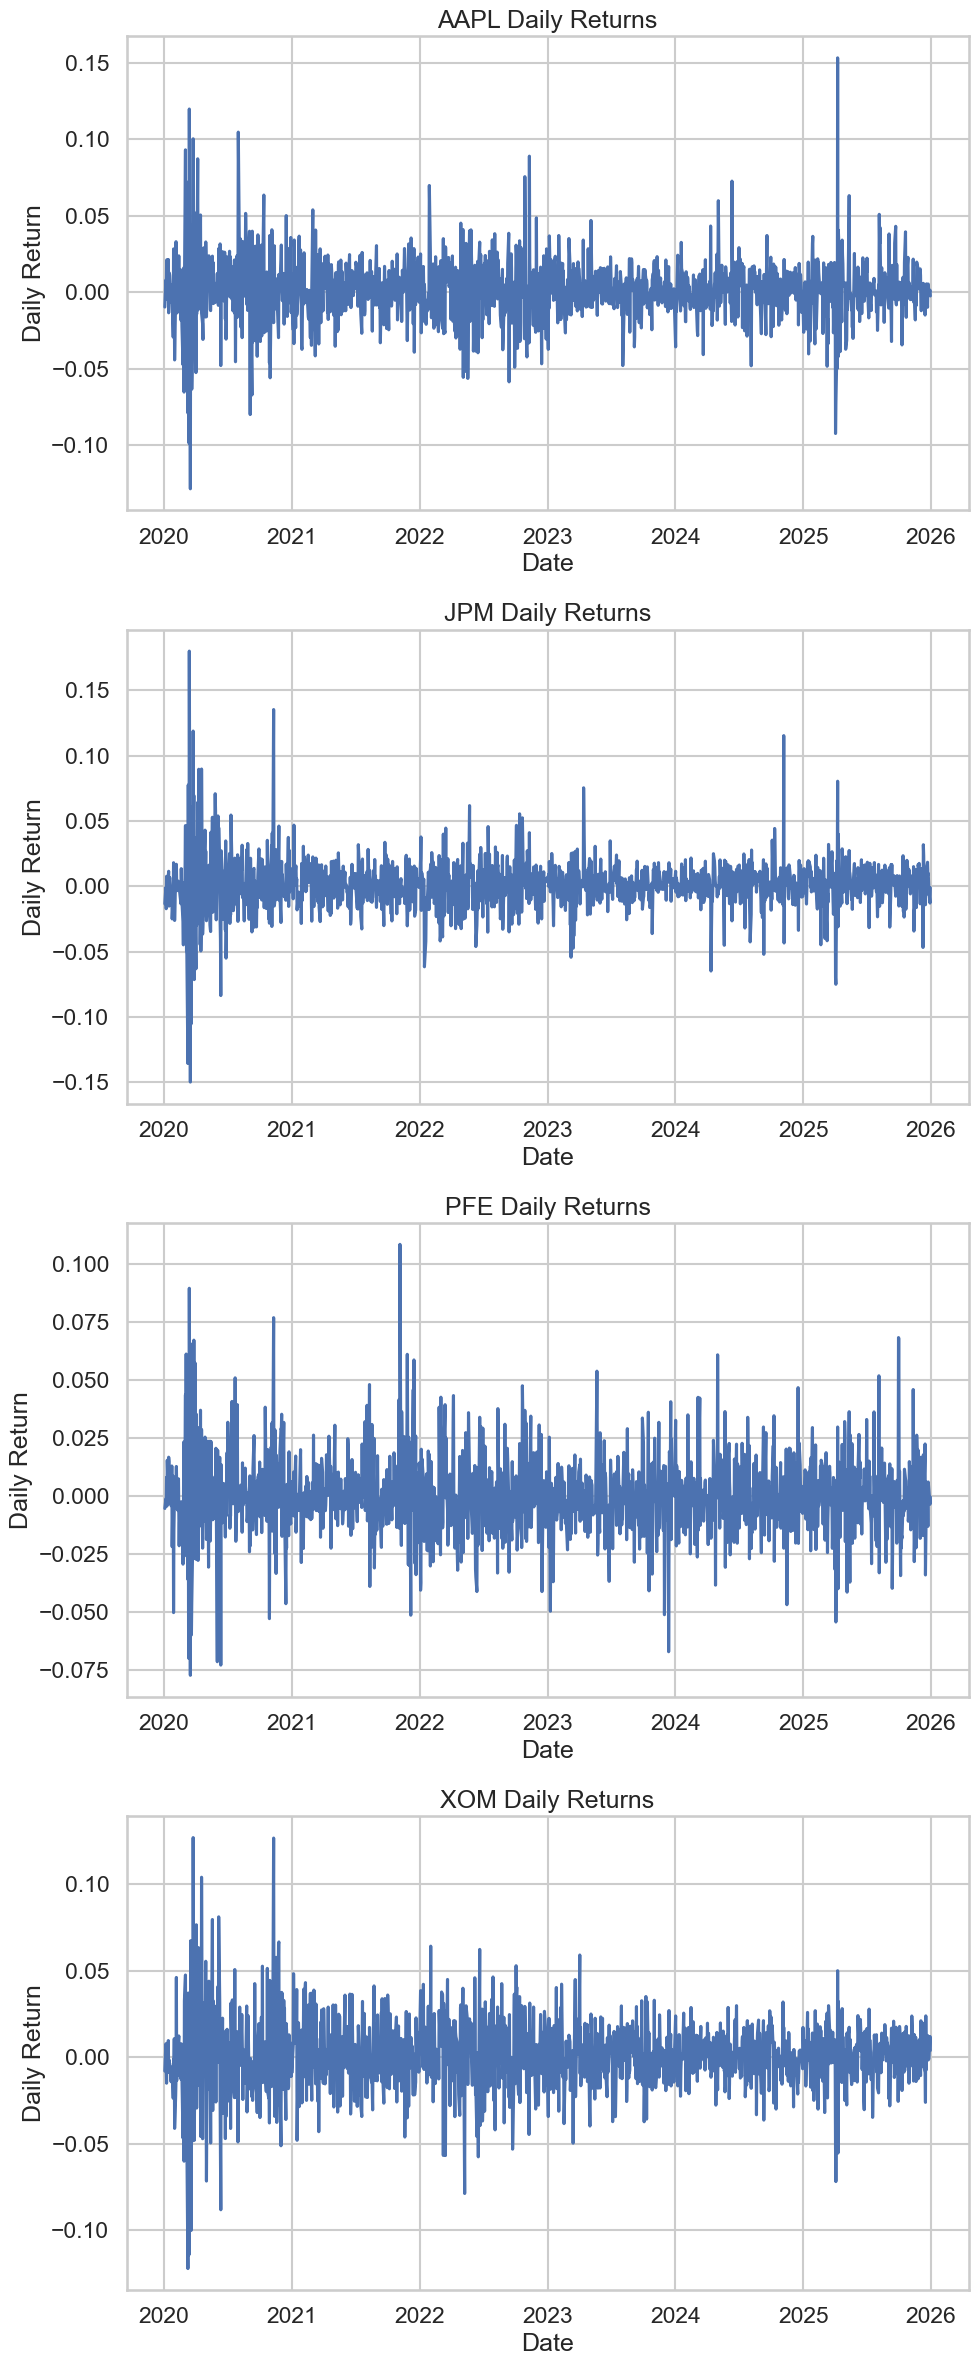

In [4]:
# TODO
#calculate daily returns
for ticker in tickers:
    stocks_data[ticker]["Daily Return"] = (stocks_data[ticker]['Close'] / stocks_data[ticker]['Close'].shift(1) - 1)
    print(f"\nDaily returns for {ticker}:")
    print(stocks_data[ticker][["Close", "Daily Return"]].head())

# Plot daily returns
fig, axs = plt.subplots(len(tickers), 1, figsize=(10, 6 * len(tickers)))
for i, ticker in enumerate(tickers):
    sns.lineplot(data=stocks_data[ticker], x=stocks_data[ticker].index, y="Daily Return", ax=axs[i])
    axs[i].set_title(f"{ticker} Daily Returns")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Daily Return")
plt.tight_layout()
plt.show()

4. **Calculate and plot the cumulative returns for each stock over the entire period. Which stock had the highest cumulative return?**

In [5]:
# TODO
# calculate the cumulative returns over entire period
for ticker in tickers:
    stocks_data[ticker]["Cumulative Return"] = (1 + stocks_data[ticker]["Daily Return"]).cumprod() - 1
    print(f"\nCumulative returns for {ticker}:")
    print(stocks_data[ticker][["Close", "Cumulative Return"]].tail())


Cumulative returns for AAPL:
Price            Close Cumulative Return
Ticker            AAPL                  
Date                                    
2025-12-23  272.359985          2.758335
2025-12-24  273.809998          2.778344
2025-12-26  273.399994          2.772686
2025-12-29  273.760010          2.777654
2025-12-30  273.079987          2.768270

Cumulative returns for JPM:
Price            Close Cumulative Return
Ticker             JPM                  
Date                                    
2025-12-23  324.466400          1.725774
2025-12-24  327.691864          1.752870
2025-12-26  326.437531          1.742333
2025-12-29  322.296204          1.707542
2025-12-30  321.967712          1.704783

Cumulative returns for PFE:
Price           Close Cumulative Return
Ticker            PFE                  
Date                                   
2025-12-23  24.470098         -0.110011
2025-12-24  24.617630         -0.104646
2025-12-26  24.676640         -0.102499
2025-12-29  24.5

**5. For each stock, calculate the rolling moving averages of the daily closing prices using a time window of 30, 60, and 90 days and plot them.**

In [6]:
# TODO
# calculate rolling moving average of daily closing prices 30, 60, 90 days
for ticker in tickers:
    stocks_data[ticker]["30-Day MA"] = stocks_data[ticker]["Close"].rolling(window=30).mean()
    stocks_data[ticker]["60-Day MA"] = stocks_data[ticker]["Close"].rolling(window=60).mean()
    stocks_data[ticker]["90-Day MA"] = stocks_data[ticker]["Close"].rolling(window=90).mean()
    print(f"\nMoving averages for {ticker}:")
    print(stocks_data[ticker][["Close", "30-Day MA", "60-Day MA", "90-Day MA"]].tail())


Moving averages for AAPL:
Price            Close   30-Day MA   60-Day MA   90-Day MA
Ticker            AAPL                                    
Date                                                      
2025-12-23  272.359985  275.246666  267.706916  257.609671
2025-12-24  273.809998  275.198666  268.030692  258.089045
2025-12-26  273.399994  275.196333  268.333982  258.567525
2025-12-29  273.760010  275.223333  268.615299  259.100513
2025-12-30  273.079987  275.245665  268.870464  259.638266

Moving averages for JPM:
Price            Close   30-Day MA   60-Day MA   90-Day MA
Ticker             JPM                                    
Date                                                      
2025-12-23  324.466400  309.333671  306.909816  304.778927
2025-12-24  327.691864  309.783310  307.163109  305.210873
2025-12-26  326.437531  310.032188  307.473430  305.638459
2025-12-29  322.296204  310.505718  307.766907  306.002637
2025-12-30  321.967712  311.163088  308.013959  306.371642

Mo